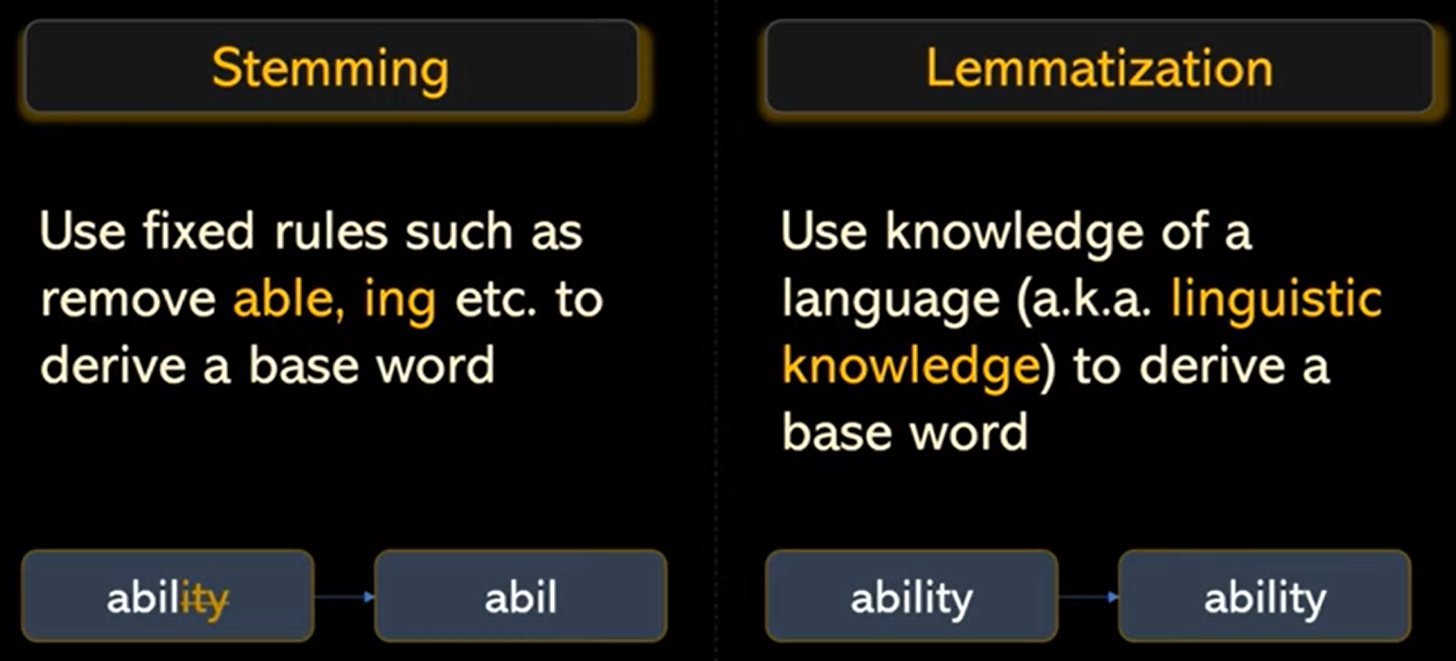

* spacy doesn't support for stemming that is why we will use nltk 

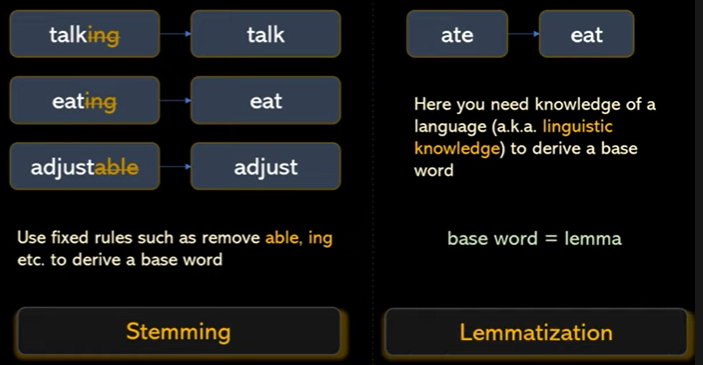

In [1]:
import nltk
import spacy

from nltk.stem import PorterStemmer

In [2]:
stemmer = PorterStemmer()

In [3]:
words = ['eating','eats','ate','adjustable','rafting','ability','meeting']

for word in words:
    print(word, '|',stemmer.stem(word))

eating | eat
eats | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


* token.lemma shows the hash of each word

In [4]:
nlp = spacy.load('en_core_web_md')

doc = nlp('eating eats eat ate adjustable rafting ability meeting better')

for token in doc:
    print(token,'|',token.lemma_, "|", token.lemma)

eating | eat | 9837207709914848172
eats | eat | 9837207709914848172
eat | eat | 9837207709914848172
ate | eat | 9837207709914848172
adjustable | adjustable | 6033511944150694480
rafting | rafting | 1196139325854331
ability | ability | 11565809527369121409
meeting | meet | 6880656908171229526
better | well | 4525988469032889948


In [5]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [6]:
doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")

for token in doc:
    print(token.text,'|', token.lemma_)

Bro | Bro
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | brah
, | ,
do | do
n't | not
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust


* since their are so many slangs for brother in english we are going to add a custom rule

In [7]:
ar = nlp.get_pipe('attribute_ruler')
ar.add([[{"TEXT":"Bro"}],[{"TEXT":"Brah"}]],{"LEMMA":"Brother"})

doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")

for token in doc:
    print(token.text,"|",token.lemma_)

Bro | Brother
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | Brother
, | ,
do | do
n't | not
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust
